In [2]:
import numpy as np
import pandas as pd

#### Load the data

In [3]:
data = pd.read_csv('housing.csv')

In [4]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [5]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [6]:
data1 = data['median_house_value']
data = data.drop(['median_house_value'], axis = 1)

In [7]:
data1

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20640, dtype: int64

In [8]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND


#### Handle missing values

In [9]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [10]:
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mean())

In [11]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

#### Encode categorical data

In [12]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
dtype: object

In [13]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
encoder = LabelEncoder()
data['ocean_proximity'] = encoder.fit_transform(data['ocean_proximity'])

In [16]:
data['ocean_proximity'].unique()

array([3, 0, 1, 4, 2])

#### Split the dataset

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data1, test_size=0.2, random_state=42)

#### Standardize data

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Plot the DataFrames

In [20]:
import matplotlib.pyplot as plt

longitude


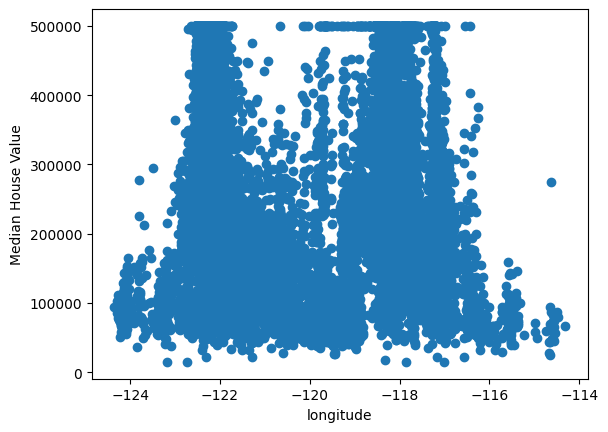

latitude


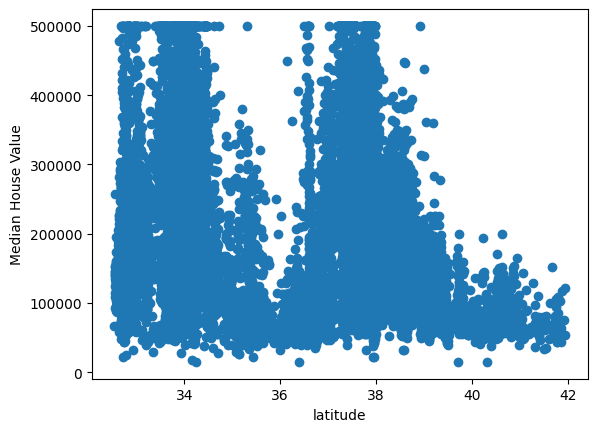

housing_median_age


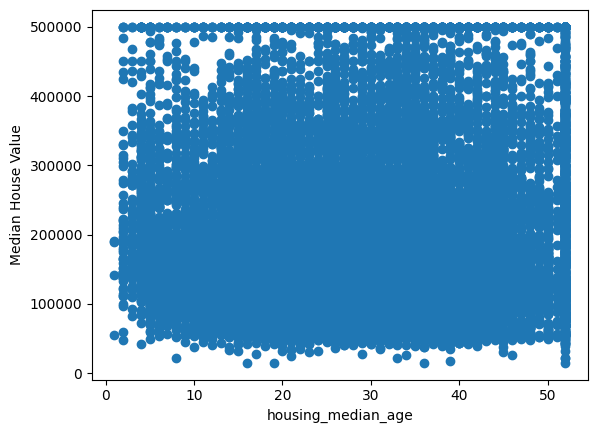

total_rooms


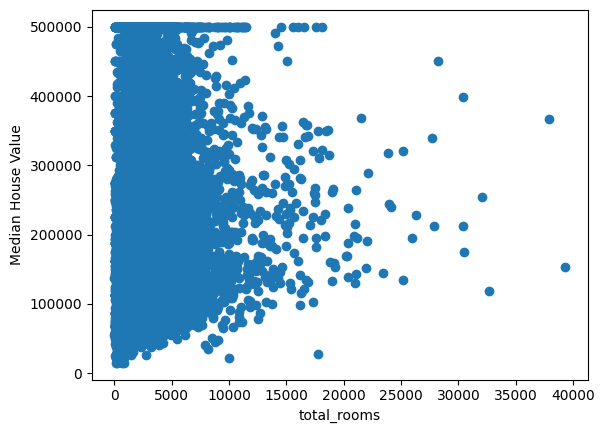

total_bedrooms


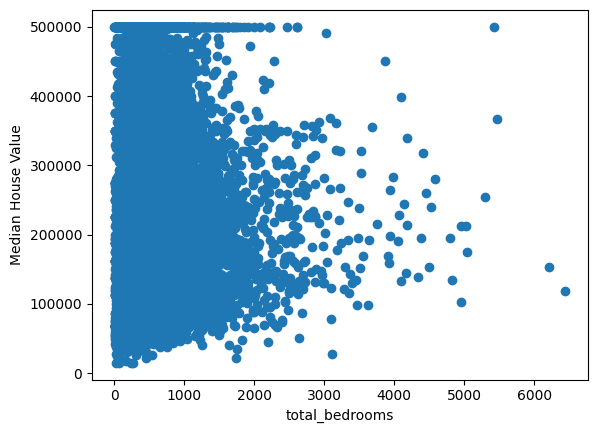

population


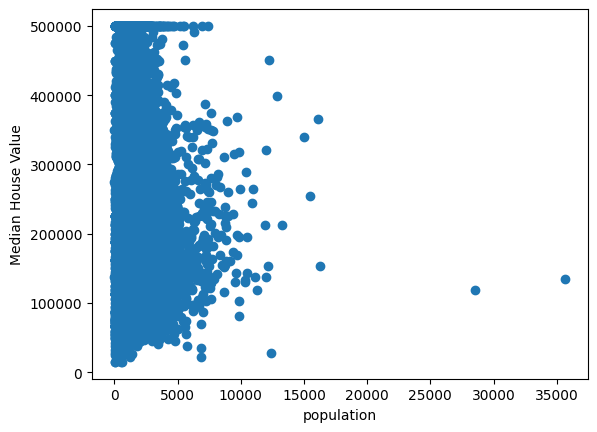

households


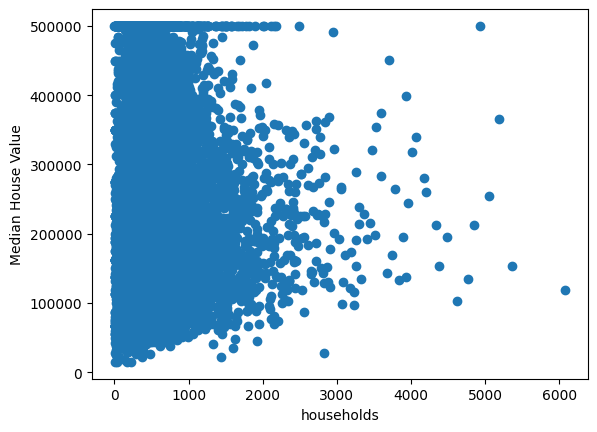

median_income


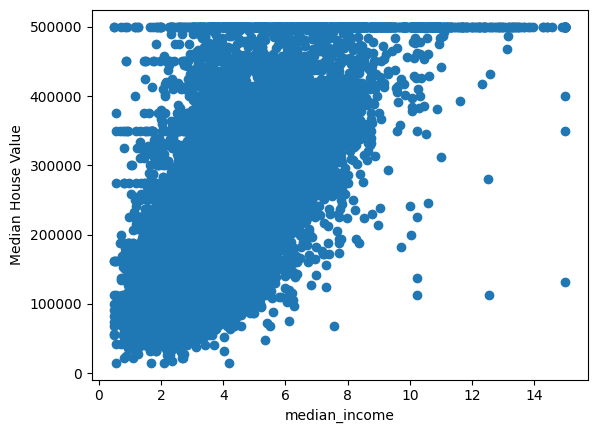

ocean_proximity


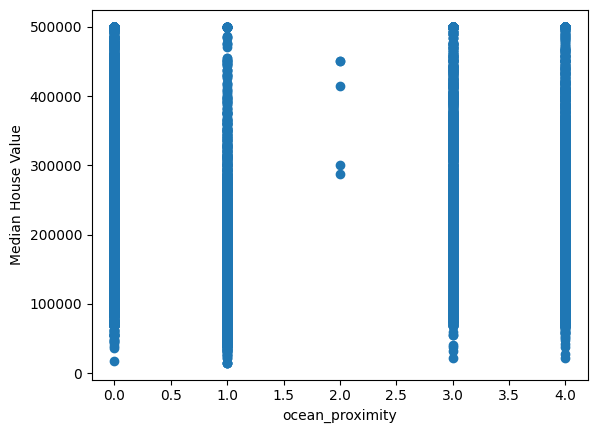

In [21]:
for i in data.columns:
    print(i)
    plt.scatter(data[i], data1)
    plt.xlabel(str(i))
    plt.ylabel('Median House Value')
    plt.show()

#### Perform Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X_test)

In [25]:
y_pred

array([ 75616.18733782, 166419.13655163, 264751.07303087, ...,
       439690.1127737 , 130408.05181885, 175513.56755484])

In [26]:
y_test

20046     47700
3024      45800
15663    500001
20484    218600
9814     278000
          ...  
15362    263300
16623    266800
18086    500001
2144      72300
3665     151500
Name: median_house_value, Length: 4128, dtype: int64

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

In [29]:
RMSE

71098.69982050033

Bonus exercise: Perform Linear Regression with one independent variable
###### • Extract just the median_income column from the independent variables (from X_train and X_test).
###### • Perform Linear Regression to predict housing values based on median_income.
###### • Predict output for test dataset using the fitted model.
###### • Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.


In [31]:
X_train_income = X_train[:, 7]
X_test_income = X_test[:, 7]

In [32]:
model2 = LinearRegression()
X_train_income = X_train_income.reshape(-1, 1)
model2.fit(X_train_income, y_train)

LinearRegression()

In [33]:
X_test_income = X_test_income.reshape(-1, 1)
y_pred2 = model2.predict(X_test_income)

In [34]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred2))

In [35]:
RMSE

84209.01241414454